In [2]:
from google.colab import drive
import pandas as pd

drive.mount("/content/gdrive")
data_raw = pd.read_json("/content/gdrive/MyDrive/data/cores.json")

data = data_raw[[
    'id',
    'length',
    'nb_views',
    'quality',
    'title',
    'voting',
    'categories',
    'tags'
]]

data[:4]

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,id,length,nb_views,quality,title,voting,categories,tags
0,0,1583,127450,LOW,Tease then suck,84,Blowjob,blowjob__oral __fullvideo__strip__tease
1,1,2501,480620,LOW,Two hot chick on one dick,79,Threesome,oral__blonde__threesome__blowjob__kissing__tig...
2,2,1513,99720,LOW,Chick stretches her pussy and blows for the cam,77,Brunette,blowjob__pussy__fingering__oral __fullvideo__s...
3,3,1710,598820,LOW,Fucking my neighbour,80,Blonde__MILF,rubbing__oral__blonde__busty__blowjob__hardcor...


In [43]:
data.sort_values(by="voting", ascending=False)[:8]

,id,length,nb_views,quality,title,voting,categories,tags
142634,142634,30,37540,LOW,Tongue Receives All The Load,95,Blonde,cumshot__pornstarnetwork.com __blonde
110019,110019,341,41480,LOW,Maid fills a hole for Halloween,94,Amateur__Verified Amateurs __Toys__Exclusive,dildo__wet-pussy __sexyhalloween2015__maid
49653,49653,60,82980,LOW,Busty MILF takes the cum in her boobs,94,Brunette__MILF,cumshot__brazzers.com__big-dick __cum__big-tit...
37022,37022,162,32250,LOW,Maria 7,94,Big Tits__Toys__Webcam,dildo__webcam __masturbation__toys__solo__amateur
125733,125733,264,36000,LOW,Everybody loves a good blowjob,94,POV __Brunette,facial __deepthroat__brunette__rubbing__cumsho...
46774,46774,291,236340,LOW,Kris L With Red Dildo,93,Pornstar __Masturbation,dildo__blonde__tight __big-tits__fake-tits__to...
155116,155116,45,90420,HD,"Peak of me with my 10"" long 2"" thick vibrator",93,Amateur__Verified Amateurs__Exclusive__HD,masturbate__dildo __vibrator__big-vibrator
122054,122054,120,69160,LOW,Blonde babe gets her face and ass fucked,93,Blonde__Threesome,squirtmycum.com __blonde__blowjob__anal


In [8]:
tags = data[data.voting > 89].tags.tolist()

tags = list(map(lambda s: str(s).split("_") , tags))

#def flatten(list):
#    return [item for sublist in list for item in sublist]

def flatten(list):
    out = []
    for sublist in list:
        for item in sublist:
            out.append(item)
    return out

tags = flatten(tags)

df = pd.DataFrame(tags)
tag_summary = pd.DataFrame(df.value_counts(), columns=["count"])
tag_summary["tag"] = tag_summary.index
tag_summary["tag"] = list(map(lambda s: s[0], tag_summary.tag))
tag_summary.reset_index(drop=True, inplace=True)
tag_summary = tag_summary[tag_summary.tag != ""]

display(tag_summary[:8])

,count,tag
1,674,blowjob
2,585,brunette
3,578,big-tits
4,518,cumshot
5,418,blonde
6,387,pornstar
7,371,hardcore
8,359,amateur


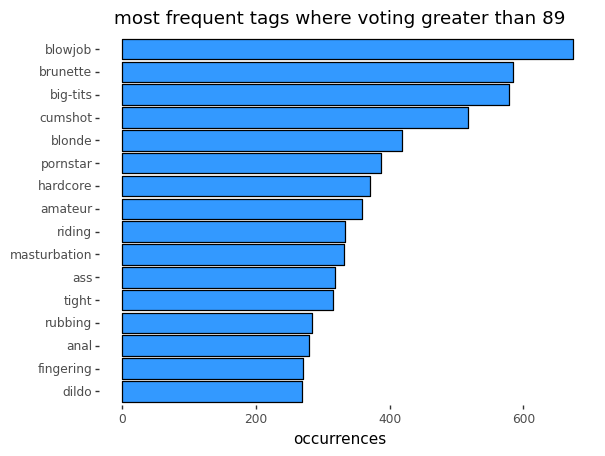

<ggplot: (8756045306983)>

In [9]:
from sqlalchemy.sql.expression import values
from plotnine.scales.scale_xy import scale_x_discrete
from plotnine import ggplot, aes, geom_col, coord_flip, labs
from plotnine.themes import theme_tufte, theme_set

theme_set(theme_tufte())

o = tag_summary.sort_values("count", ascending=False).reset_index(drop=True)

no_tags = 16

o['tag'] = pd.Categorical(o.tag, categories=pd.unique(o.tag)[::-1])

p = (ggplot(o[:no_tags])
    + aes(x="tag", y="count")
    + geom_col(fill="#0080ff", color="#000", alpha=0.8)
    + coord_flip()
    + labs(title="most frequent tags where voting greater than 89", x="", y="occurrences")
)
p

In [4]:
tags = data[data.nb_views > 3.82e5].tags.tolist()

tags = list(map(lambda s: str(s).split("_") , tags))

def flatten(l):
    return [item for sublist in l for item in sublist]

tags = flatten(tags)

df = pd.DataFrame(tags)
tag_summary = pd.DataFrame(df.value_counts(), columns=["count"])
tag_summary["tag"] = tag_summary.index
tag_summary["tag"] = list(map(lambda s: s[0], tag_summary.tag))
tag_summary.reset_index(drop=True, inplace=True)
tag_summary = tag_summary[tag_summary.tag != ""]

display(tag_summary[:8])

,count,tag
1,19261,blowjob
2,14285,brunette
3,14115,big-tits
4,11346,cumshot
5,10283,blonde
6,9654,hardcore
7,8702,natural-tits
8,7853,amateur


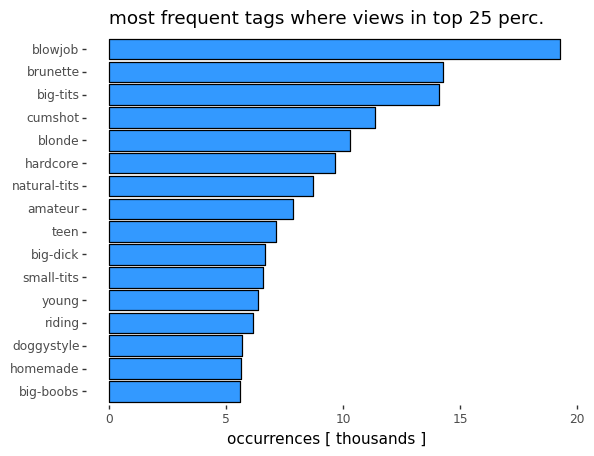

<ggplot: (8756045306926)>

In [5]:
from sqlalchemy.sql.expression import values
from plotnine.scales.scale_xy import scale_x_discrete
from plotnine import ggplot, aes, geom_col, coord_flip, labs
from plotnine.themes import theme_tufte, theme_set

theme_set(theme_tufte())

o = tag_summary.sort_values("count", ascending=False).reset_index(drop=True)

no_tags = 16

p = (ggplot(o[:no_tags])
    + aes(x="reorder(tag, count)", y="count / 1e3")
    + geom_col(fill="#0080ff", color="#000", alpha=0.8)
    + coord_flip()
    + labs(
        title="most frequent tags where views in top 25 perc.",
        x="",
        y="occurrences [ thousands ]"
    )
)
p